# Numerical differentiation

## Objectives:

   * explain the definitions of forward, backward, and center divided methods for numerical differentiation
   * find approximate values of the first derivative of continuous functions
   * reason about the accuracy of the numbers
   * find approximate values of the first derivative of discrete functions (given at discrete data points)
   
   
Numerical differentiation is the process of finding the numerical value of a derivative of a given function at a given point.

A simple two-point estimation is to compute the slope of a nearby secant line through the points $(x, f(x))$ and $(x + h, f(x + h))$. Choosing a small number $h$, $h$ represents a small change in $x$ ($h <<1$ and is positive). The slope of this line is 

![secant slope](https://raw.githubusercontent.com/kks32-courses/ce311k/master/notebooks/lectures/05_numerical_diff_taylor_series_newton_raphson/derivative.png)

$$f^\prime(x) \approxeq \lim_{h\rightarrow 0}\frac{f(x+h) - f(x)}{h}$$

Three basic types are commonly considered: forward, backward, and central differences.


![differencing schemes](https://raw.githubusercontent.com/kks32-courses/ce311k/master/notebooks/lectures/05_numerical_diff_taylor_series_newton_raphson/finite-difference-methods.png)

## Forward difference


$$f^\prime(x) = \frac{f(x+h) - f(x)}{h} + O(h)$$


In [1]:
import math

def forward_diff(f, x, h=1e-4):
    dfx = (f(x+h) - f(x))/h
    return dfx

x = 0.5
df = forward_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.4794694169341085, which is -sin(x) -0.479425538604203
O(h) is  -4.387832990548901e-05


## Backward difference


$$f^\prime(x) = \frac{f(x) - f(x-h)}{h} + O(h)$$

In [2]:
import math

def backward_diff(f, x, h=1e-4):
    dfx = (f(x) - f(x-h))/h
    return dfx

x = 0.5
df = backward_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.47938165867678073, which is -sin(x) -0.479425538604203
O(h) is  4.3879927422274534e-05


## Central difference method


$$f^\prime(x) = \frac{f(x+h) - f(x-h)}{2h} + O(h^2)$$

In [3]:
import math

def central_diff(f, x, h=1e-4):
    dfx = (f(x+h) - f(x-h))/(2*h)
    return dfx

x = 0.5
df = central_diff(math.cos, x)
print ("first derivative of cos(x) is {}, which is -sin(x) {}".format(df, -math.sin(x)))
print("O(h^2) is ", (df + math.sin(x)))

first derivative of cos(x) is -0.4794255378054446, which is -sin(x) -0.479425538604203
O(h^2) is  7.98758392761556e-10


## Second derivative
$$f^{\prime\prime}(x) = \frac{f(x+h) - 2 f(x) + f(x-h)}{h^2} + O(h^2)$$

In [4]:
import math

def central_second_diff(f, x, h=1e-4):
    dfx = (f(x+h) -2*f(x) + f(x-h))/(h**2)
    return dfx

x = 0.5
df = central_second_diff(math.cos, x)
print ("second derivative of cos(x) is {}, which is -cos(x) {}".format(df, -math.cos(x)))
print("O(h^2) is ", (df + math.sin(x)))

second derivative of cos(x) is -0.8775825732776354, which is -cos(x) -0.8775825618903728
O(h^2) is  -0.39815703467343244


# Scipy differentiate

Another library, which largely builds on NumPy and provides additional functionality, is SciPy (https://www.scipy.org/). SciPy provides some  more specialised data structures and functions over NumPy. 
If you are familiar with MATLAB, NumPy and SciPy provide much of what is available in MATLAB.

[scipy derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

```
from scipy.misc import derivative

scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)[source]
```

In [5]:
from scipy.misc import derivative
def f(x):
    return x**3 + x**2

derivative(math.cos, .5, dx=1e-6, n=2)

-0.8777423232686488

# Taylor series and approximations

Taylor series is one the best tools maths has to offer for approximating functions. Taylor series is about taking non-polynomial functions and finding polyomials that approximate at some input. The motive here is the polynomials tend to be much easier to deal with than other functions, they are easier to compute, take derivatives, integrate, just easier overall. 

Taylor series of a function is an infinite sum of terms that are expressed in terms of the function's derivatives at a single point. The Taylor series of a function $f(x)$ that is infinitely differentiable at a real or complex number $a$ is the power series

$$f(a)+\frac {f'(a)}{1!} (x-a)+ \frac{f''(a)}{2!} (x-a)^2+\frac{f'''(a)}{3!}(x-a)^3+ \cdots$$

## Potential energy of a simple pendulum


To determine the potential energy of a pendulum, for that we need an expression for how high the weight of the pendulum is above its lowest point. This works out to be  $h = R(1 - \cos(\theta))$ The cosine function made the problem awkward and unweildy. But, if we approximate the $\cos(\theta) \approx 1 + \frac{\theta^2}{2}$ of all things, everything just fell into place much more easily. An approximation like that might seem completely out of left field. If we graph these functions, they do look close to each other for small angles.

![pendulum](https://raw.githubusercontent.com/kks32-courses/ce311k/master/notebooks/lectures/05_numerical_diff_taylor_series_newton_raphson/simple-pendulum.png)


(-1.0, 1.0)

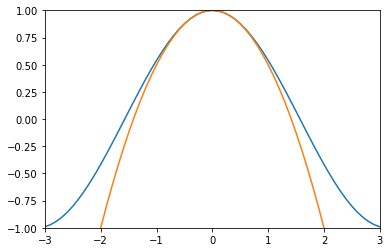

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-3,3.1,0.1)   # start,stop,step
y = np.cos(x)

z = [1 - i**2/2 for i in x]

plt.plot(x, y)
plt.plot(x, z)
plt.xlim([-3, 3])
plt.ylim([-1, 1])

## Approx cos Taylor series


$$\cos(x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} \cdots$$

(-1.0, 1.0)

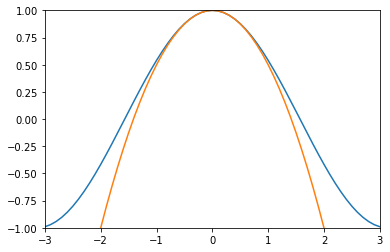

In [11]:
import matplotlib.pyplot as plt
import math
import numpy as np

x = np.arange(-9,9.1,0.1)   # start,stop,step
y = np.cos(x)

plt.plot(x, y)


def cos_approx(x, n = 4):
    cos = 1
    j = -1
    for i in np.arange(2, n, 2):
        cos += x**i * j / math.factorial(i)
        j = j * -1
    return cos
    #return 1 - x**2/2 + x**4/math.factorial(4)


z = [cos_approx(i, ) for i in x]


plt.plot(x, z)
plt.xlim([-3, 3])
plt.ylim([-1, 1])



## Newton Raphson

The Newton-Raphson method (also known as Newton's method) is a way to quickly find a good approximation for the root of a real-valued function $f(x)=0$. It uses the idea that a continuous and differentiable function can be approximated by a straight line tangent to it. Suppose you need to find the root of a continuous, differentiable function f(x)f(x)f(x), and you know the root you are looking for is near the point $x = x_0$. Then Newton's method tells us that a better approximation for the root is 

$$x_{1} = x_0 - \frac{f(x_0)}{f^\prime(x_0)}$$

This process may be repeated as many times as necessary to get the desired accuracy. In general, for any $x-$value $x_n$, the next value is given by 

$$x_{n+1} = x_n - \frac{f(x_n)}{f^\prime(x_n)}$$

In [8]:
# The function is x^3 - x^2 + 2 
def fn(x): 
    return x**3 - x**2 + 2
  
# Derivative of the above function  
# which is 3*x^x - 2*x 
def dfn(x): 
    return 3 * x**2 - 2 * x 
  
# Function to find the root 
def newton_raphson(x): 
    for i in range(1000):
        h = fn(x) / dfn(x) 
        # x(i+1) = x(i) - f(x) / f'(x) 
        x = x - h 
        if abs(h) < 0.0001:
            return x
          
        
# 
x0 = -20 # Initial values assumed 
print("The root of fn: {}".format(newton_raphson(x0)))

The root of fn: -1.000000000000011


## Generic Newton Raphson method

In [9]:
from scipy.misc import derivative

# The function is x^3 - x^2 + 2 
def f0(x): 
    return x**3 - x**2 + 2
  
# Function to find the root 
def newton_raphson(fn, x): 
    for i in range(1000):
        h = fn(x) / derivative(fn, x, dx=1e-6) 
        # x(i+1) = x(i) - f(x) / f'(x) 
        x = x - h 
        if abs(h) < 0.0001:
            return x
          
        
# 
x0 = -20 # Initial values assumed 
print("The root of fn: {}".format(newton_raphson(f0, x0)))

The root of fn: -1.000000000000011
